In [1]:
# dependencies
import matplotlib.pyplot as plt
import requests
import json
import pandas as pd
import numpy as np

In [2]:
#dictionary for in-CA counties

base_url = "https://api.census.gov/data/2017/acs/acs1/profile"

ca_cty_name = ["San Francisco","Alameda","San Mateo","Contra Costa","Los Angeles","Santa Clara"]
ca_st_fips = ["06","06","06","06","06","06"]
ca_cty_fips = ["075","001","081","013","037","085"]

in_ca_dict = {
    "County Name": ca_cty_name,
    "State_FIPS": ca_st_fips,
    "County_FIPS": ca_cty_fips
}

in_ca_df = pd.DataFrame(in_ca_dict)
in_ca_df

,County Name,State_FIPS,County_FIPS
0,San Francisco,06,075
1,Alameda,06,001
2,San Mateo,06,081
3,Contra Costa,06,013
4,Los Angeles,06,037
5,Santa Clara,06,085


In [3]:
#collect median home values by county

ca_med_home_val = []
med_home_var = "DP04_0089E"
    
for county_id, state_id in zip(ca_cty_fips, ca_st_fips):
    med_home_val = requests.get(f"{base_url}?get={med_home_var}&for=county:{county_id}&in=state:{state_id}").json()
    ca_med_home_val.append(int(med_home_val[1][0]))
    
print(ca_med_home_val)
in_ca_df["Med_Home_Value"] = ca_med_home_val
in_ca_df

[1104100, 781000, 1087100, 642300, 588700, 971300]


,County Name,State_FIPS,County_FIPS,Med_Home_Value
0,San Francisco,06,075,1104100
1,Alameda,06,001,781000
2,San Mateo,06,081,1087100
3,Contra Costa,06,013,642300
4,Los Angeles,06,037,588700
5,Santa Clara,06,085,971300


Text(0,0.5,'Median Home Value ($)')

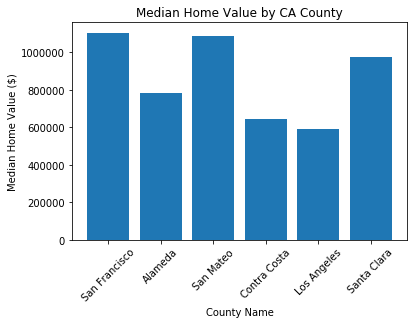

In [5]:
#plot in-CA median home values
x_axis = np.arange(len(ca_cty_name))
tick_locations = [x for x in x_axis]
plt.bar(x_axis, ca_med_home_val)
plt.xticks(tick_locations, ca_cty_name, rotation=45)

plt.title("Median Home Value by CA County")
plt.xlabel("County Name")
plt.ylabel("Median Home Value ($)")

In [6]:
#dictionary for non-CA counties

nonca_cty_name = ["San Francisco","New York County","King County","Multnomah County","Kings County","Cook County"]
nonca_st_fips = ["06","36","53","41","36","17"]
nonca_cty_fips = ["075","061","033","051","047","031"]

non_ca_dict = {
    "County Name": nonca_cty_name,
    "State_FIPS": nonca_st_fips,
    "County_FIPS": nonca_cty_fips
}

non_ca_df = pd.DataFrame(non_ca_dict)
non_ca_df

,County Name,State_FIPS,County_FIPS
0,San Francisco,06,075
1,New York County,36,061
2,King County,53,033
3,Multnomah County,41,051
4,Kings County,36,047
5,Cook County,17,031


In [7]:
#collect median home values by county

non_ca_med_home_val = []
med_home_var = "DP04_0089E"

for county_id, state_id in zip(nonca_cty_fips, nonca_st_fips):
    med_home_val = requests.get(f"{base_url}?get={med_home_var}&for=county:{county_id}&in=state:{state_id}").json()
    non_ca_med_home_val.append(int(med_home_val[1][0]))
    
print(non_ca_med_home_val)
non_ca_df["Med_Home_Value"] = non_ca_med_home_val
non_ca_df

[1104100, 976100, 563600, 393900, 701800, 247600]


,County Name,State_FIPS,County_FIPS,Med_Home_Value
0,San Francisco,06,075,1104100
1,New York County,36,061,976100
2,King County,53,033,563600
3,Multnomah County,41,051,393900
4,Kings County,36,047,701800
5,Cook County,17,031,247600


Text(0,0.5,'Median Home Value ($)')

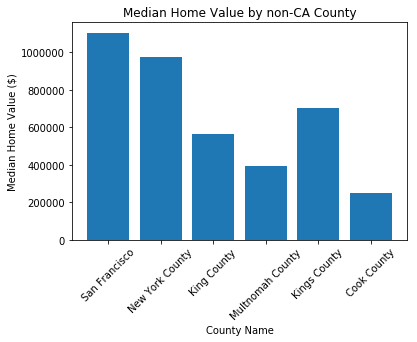

In [8]:
#plot non-CA median home values

x_axis = np.arange(len(nonca_cty_name))
tick_locations = [x for x in x_axis]
plt.bar(x_axis, non_ca_med_home_val)
plt.xticks(tick_locations, nonca_cty_name, rotation=45)

plt.title("Median Home Value by non-CA County")
plt.xlabel("County Name")
plt.ylabel("Median Home Value ($)")

In [9]:
#follow the same process for median gross rents

ca_med_rent = []
med_rent_var = "DP04_0134E"
    
for county_id, state_id in zip(ca_cty_fips, ca_st_fips):
    med_rent = requests.get(f"{base_url}?get={med_rent_var}&for=county:{county_id}&in=state:{state_id}").json()
    ca_med_rent.append(int(med_rent[1][0]))
    
print(ca_med_rent)
in_ca_df["Med_Rent"] = ca_med_rent
in_ca_df

[1836, 1745, 2259, 1766, 1402, 2229]


,County Name,State_FIPS,County_FIPS,Med_Home_Value,Med_Rent
0,San Francisco,06,075,1104100,1836
1,Alameda,06,001,781000,1745
2,San Mateo,06,081,1087100,2259
3,Contra Costa,06,013,642300,1766
4,Los Angeles,06,037,588700,1402
5,Santa Clara,06,085,971300,2229


Text(0,0.5,'Median Rent ($)')

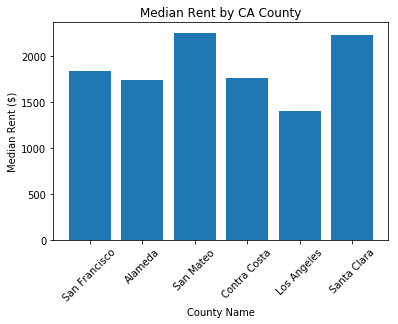

In [10]:
x_axis = np.arange(len(ca_cty_name))
tick_locations = [x for x in x_axis]
plt.bar(x_axis, ca_med_rent)
plt.xticks(tick_locations, ca_cty_name, rotation=45)

plt.title("Median Rent by CA County")
plt.xlabel("County Name")
plt.ylabel("Median Rent ($)")

In [11]:
non_ca_med_rent = []
med_rent_var = "DP04_0134E"

for county_id, state_id in zip(nonca_cty_fips, nonca_st_fips):
    med_rent= requests.get(f"{base_url}?get={med_rent_var}&for=county:{county_id}&in=state:{state_id}").json()
    non_ca_med_rent.append(int(med_rent[1][0]))
    
print(non_ca_med_rent)
non_ca_df["Med_Rent"] = non_ca_med_rent
non_ca_df

[1836, 1601, 1555, 1199, 1367, 1082]


,County Name,State_FIPS,County_FIPS,Med_Home_Value,Med_Rent
0,San Francisco,06,075,1104100,1836
1,New York County,36,061,976100,1601
2,King County,53,033,563600,1555
3,Multnomah County,41,051,393900,1199
4,Kings County,36,047,701800,1367
5,Cook County,17,031,247600,1082


Text(0,0.5,'Median Home Value ($)')

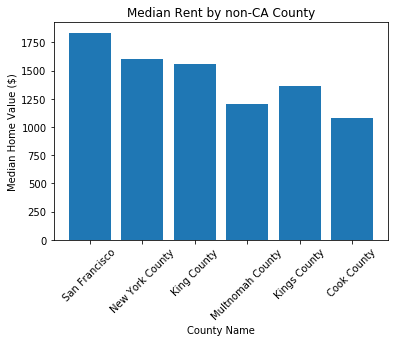

In [12]:
x_axis = np.arange(len(nonca_cty_name))
tick_locations = [x for x in x_axis]
plt.bar(x_axis, non_ca_med_rent)
plt.xticks(tick_locations, nonca_cty_name, rotation=45)

plt.title("Median Rent by non-CA County")
plt.xlabel("County Name")
plt.ylabel("Median Home Value ($)")

In [14]:
#follow the same process for home owner rate

ca_own_rate = []
home_own_var = "DP04_0046PE"
    
for county_id, state_id in zip(ca_cty_fips, ca_st_fips):
    own_rate = requests.get(f"{base_url}?get={home_own_var}&for=county:{county_id}&in=state:{state_id}").json()
    ca_own_rate.append(float(own_rate[1][0]))
    
print(ca_own_rate)
in_ca_df["Home Own Rate"] = ca_own_rate
in_ca_df

[36.5, 53.3, 59.1, 67.8, 45.6, 56.8]


,County Name,State_FIPS,County_FIPS,Med_Home_Value,Med_Rent,Home Own Rate
0,San Francisco,06,075,1104100,1836,36.5
1,Alameda,06,001,781000,1745,53.3
2,San Mateo,06,081,1087100,2259,59.1
3,Contra Costa,06,013,642300,1766,67.8
4,Los Angeles,06,037,588700,1402,45.6
5,Santa Clara,06,085,971300,2229,56.8


Text(0,0.5,'Home Ownership Rate (%)')

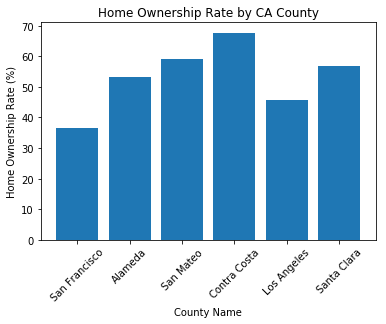

In [17]:
x_axis = np.arange(len(ca_cty_name))
tick_locations = [x for x in x_axis]
plt.bar(x_axis, ca_own_rate)
plt.xticks(tick_locations, ca_cty_name, rotation=45)

plt.title("Home Ownership Rate by CA County")
plt.xlabel("County Name")
plt.ylabel("Home Ownership Rate (%)")

In [16]:
nonca_own_rate = []
home_own_var = "DP04_0046PE"
    
for county_id, state_id in zip(nonca_cty_fips, nonca_st_fips):
    own_rate = requests.get(f"{base_url}?get={home_own_var}&for=county:{county_id}&in=state:{state_id}").json()
    nonca_own_rate.append(float(own_rate[1][0]))
    
print(nonca_own_rate)
non_ca_df["Home Own Rate"] = nonca_own_rate
non_ca_df

[36.5, 24.7, 56.6, 55.5, 30.4, 56.4]


,County Name,State_FIPS,County_FIPS,Med_Home_Value,Med_Rent,Home Own Rate
0,San Francisco,06,075,1104100,1836,36.5
1,New York County,36,061,976100,1601,24.7
2,King County,53,033,563600,1555,56.6
3,Multnomah County,41,051,393900,1199,55.5
4,Kings County,36,047,701800,1367,30.4
5,Cook County,17,031,247600,1082,56.4


Text(0,0.5,'Home Ownership Rate (%)')

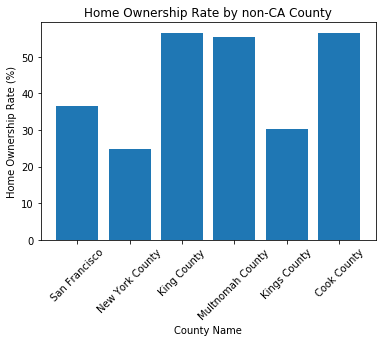

In [18]:
x_axis = np.arange(len(nonca_cty_name))
tick_locations = [x for x in x_axis]
plt.bar(x_axis, nonca_own_rate)
plt.xticks(tick_locations, nonca_cty_name, rotation=45)

plt.title("Home Ownership Rate by non-CA County")
plt.xlabel("County Name")
plt.ylabel("Home Ownership Rate (%)")